In [13]:
import sklearn
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt

In [14]:
fname=r'D:\about_me\大二上\机器学习\第一次作业\11_train.csv'

f=open(fname,encoding='UTF-8')

names=['x1','x2','y']
data=pd.read_csv(f,names=names)
print(data)

           x1         x2    y
0   44.668262  66.450086  0.0
1   67.946855  46.678574  0.0
2   56.253817  39.261473  0.0
3   93.114389  38.800670  0.0
4   34.524514  60.396342  0.0
..        ...        ...  ...
75  97.771599  86.727822  1.0
76  75.477702  90.424539  1.0
77  72.346494  96.227593  1.0
78  78.635424  96.647427  1.0
79  94.094331  77.159105  1.0

[80 rows x 3 columns]


In [15]:
X=data.iloc[:,0:2]
y=data.iloc[:,2]

In [16]:
classifer = LogisticRegression()  
classifer.fit(X,y)  #模型训练

LogisticRegression()

In [17]:
scores = cross_val_score(classifer,X,y,cv=10) 
print ('准确率：',np.mean(scores),scores)  
precisions = cross_val_score(classifer, X, y, cv=10, scoring='precision')  #交叉验证算查准率和查全率
print('精确率：', np.mean(precisions), precisions)  
recalls = cross_val_score(classifer, X, y, cv=10, scoring='recall')  
print('召回率：', np.mean(recalls), recalls) 
f1s = cross_val_score(classifer, X, y, cv=10, scoring='f1')  
print('综合评价指标：', np.mean(f1s), f1s)

准确率： 0.8875 [1.    0.875 0.875 0.875 0.75  0.875 1.    0.875 0.875 0.875]
精确率： 0.9133333333333334 [1.         0.83333333 0.83333333 0.83333333 0.8        1.
 1.         1.         1.         0.83333333]
召回率： 0.9200000000000002 [1.  1.  1.  1.  0.8 0.8 1.  0.8 0.8 1. ]
综合评价指标： 0.9103030303030304 [1.         0.90909091 0.90909091 0.90909091 0.8        0.88888889
 1.         0.88888889 0.88888889 0.90909091]


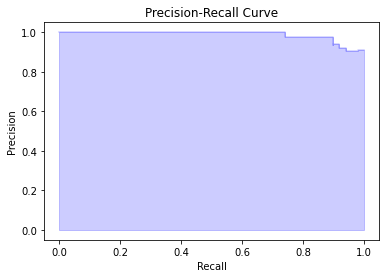

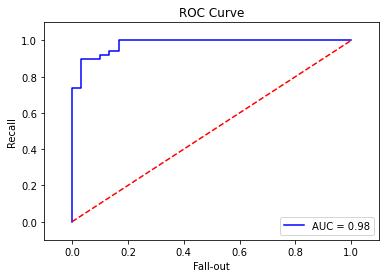

In [18]:
predictions=classifer.predict_proba(X)
precision, recall, _ = precision_recall_curve(y, predictions[:, 1])
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
false_positive_rate, recall, thresholds = roc_curve(y, predictions[:, 1],drop_intermediate=False)  
roc_auc = auc(false_positive_rate, recall)    
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1], 'r--') 
plt.xlim([-0.1, 1.1])  
plt.ylim([-0.1, 1.1])  
plt.title('ROC Curve')
plt.ylabel('Recall')  
plt.xlabel('Fall-out')  
plt.show()
#plt.ylim([0.0, 1.05])
#plt.xlim([0.0, 1.0])